## Step 1: Define The Question
Can we "predict" the price of a diamond based on its features? <br />
What features have the greatest impact?

## Step 2: Collect the Data

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("Diamonds Prices.csv")

In [2]:
data.shape

(53943, 11)

### Step 3:
Clean the Data <br/ >
- .info to get dtype and null data count. <br/ >
- Removing outliers<br/ >
- Removing duplicates<br/ >
- Standardize column names and categorical column values<br/ >
- Handle Blanks<br/ >
- Reduce unnecessary columns<br/ >


In [3]:
#Show basic information for the data
#With this I can double check if there is null data and if there is an incorrect data type.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53943 non-null  int64  
 1   carat       53943 non-null  float64
 2   cut         53943 non-null  object 
 3   color       53943 non-null  object 
 4   clarity     53943 non-null  object 
 5   depth       53943 non-null  float64
 6   table       53943 non-null  float64
 7   price       53943 non-null  int64  
 8   x           53943 non-null  float64
 9   y           53943 non-null  float64
 10  z           53943 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [4]:
#Based on the our data.info we can see there is a column name "Unnamed: 0"
#I will look this column and determine what to do with it now.
data['Unnamed: 0']

0            1
1            2
2            3
3            4
4            5
         ...  
53938    53939
53939    53940
53940    53941
53941    53942
53942    53943
Name: Unnamed: 0, Length: 53943, dtype: int64

In [5]:
#data['Unnamed: 0'] seems to be an index column so to fix this I will just delete it.
del data['Unnamed: 0']

In [6]:
#Make sure the column is no longer there.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  object 
 2   color    53943 non-null  object 
 3   clarity  53943 non-null  object 
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   price    53943 non-null  int64  
 7   x        53943 non-null  float64
 8   y        53943 non-null  float64
 9   z        53943 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [7]:
#Check for duplicates
data.duplicated().sum()

149

In [8]:
#Since we have duplicates I am going to delete them
data = data.drop_duplicates()

In [9]:
#I am goign to double check that duplciates arent there anymore
#The previous number of rows was 53943
data.shape

(53794, 10)

In [10]:
#I am going to now make sure that all categorical columns have no errors in terms of values
#I.E. instead of "Sharp" it is "SHarp"
#I am going to do this by iterating through every column and printing the values
#for only categorical column

for column in data.columns:
    if data[column].dtype == "object":
        print(data[column].value_counts(), "\n")

Ideal        21488
Premium      13748
Very Good    12069
Good          4891
Fair          1598
Name: cut, dtype: int64 

G    11262
E     9776
F     9520
H     8272
D     6755
I     5407
J     2802
Name: color, dtype: int64 

SI1     13032
VS2     12229
SI2      9150
VS1      8156
VVS2     5056
VVS1     3647
IF       1784
I1        740
Name: clarity, dtype: int64 



C:\Users\Alex\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)


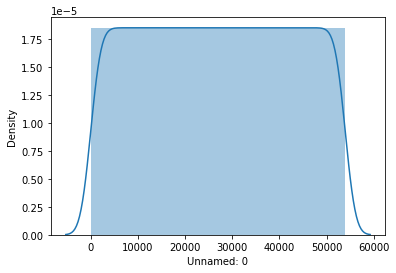

C:\Users\Alex\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)


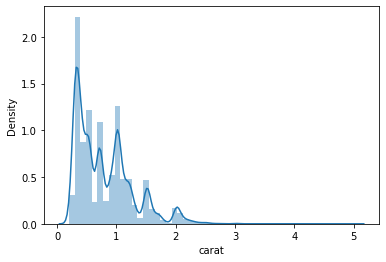

C:\Users\Alex\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)


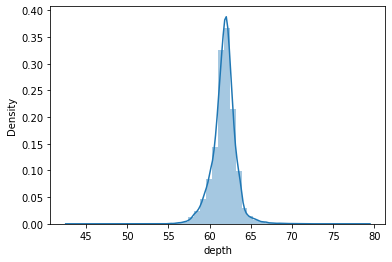

C:\Users\Alex\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)


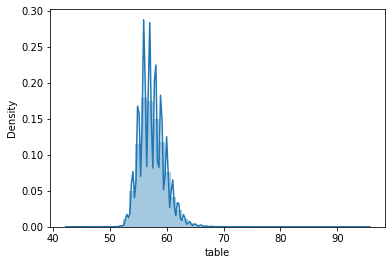

C:\Users\Alex\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)


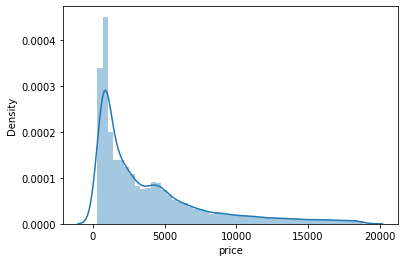

C:\Users\Alex\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)


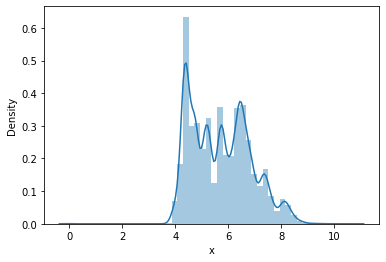

C:\Users\Alex\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)


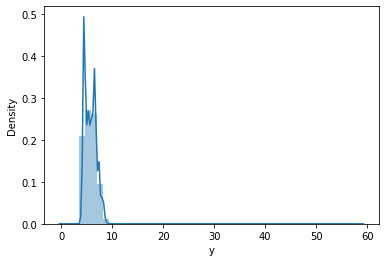

C:\Users\Alex\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)


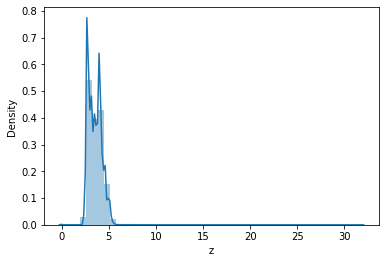

In [3]:
#Since there are no errors in my categorical columns, I will now check for outliers.
#To do this I will iterate through all numerical columns and print distplots for each numerical columns.
import seaborn as sns
import matplotlib.pyplot as plt

for column in data.select_dtypes(np.number).columns:     
    print(sns.distplot(data[column]))
    plt.show()

In [103]:
#I have 5 tables with tails:
# -carat
#   -might also need log transformation to center the distribution
# -table
# -price
#   -might also need log transformation to center the distribution
# -y
# -z

#I am going to keep track of how much data is removed by while cleaning our data
lost_data = 0

In [104]:
data = pd.read_csv("Diamonds Prices.csv")

C:\Users\Alex\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


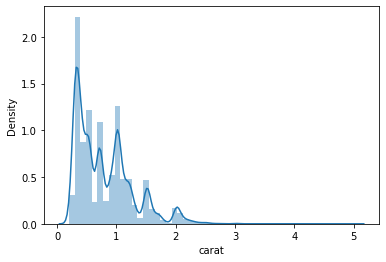

C:\Users\Alex\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


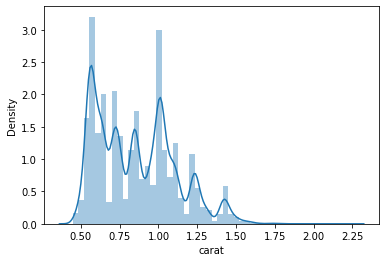

C:\Users\Alex\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


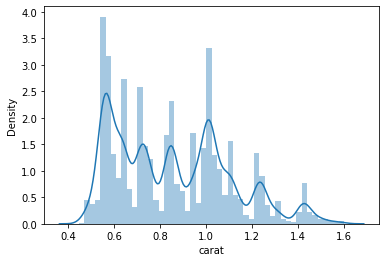

77


In [105]:
from scipy import stats

o_size = data.shape[0]
sns.distplot(data['carat'])
plt.show()
sns.distplot(np.sqrt(data['carat']))
plt.show()
data['carat'] = np.sqrt(data['carat'])
iqr = np.percentile(data['carat'],75) - np.percentile(data['carat'],25)
upper_limit = np.percentile(data['carat'],75) + 1.5*iqr
lower_limit = np.percentile(data['carat'],25) - 0*iqr
data = data[(data['carat']<upper_limit)]
lost_data += o_size - data.shape[0]
sns.distplot(data['carat'])
plt.show()
print(o_size - data.shape[0])
#Since the graph isnt too different with log transformations I am going to move on without it

C:\Users\Alex\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


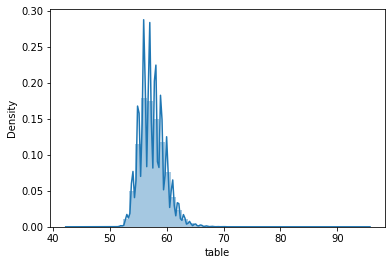

C:\Users\Alex\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


400


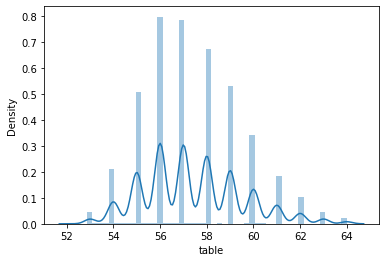

In [106]:
o_size = data.shape[0]
sns.distplot(data['table'])
plt.show()
iqr = np.percentile(data['table'],75) - np.percentile(data['table'],25)
upper_limit = np.percentile(data['table'],75) + 1.7*iqr
lower_limit = np.percentile(data['table'],25) - 1.3*iqr
data = data[(data['table']>lower_limit) & (data['table']<upper_limit)]
lost_data += o_size - data.shape[0]
sns.distplot(data['table'])
print(o_size - data.shape[0])

C:\Users\Alex\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


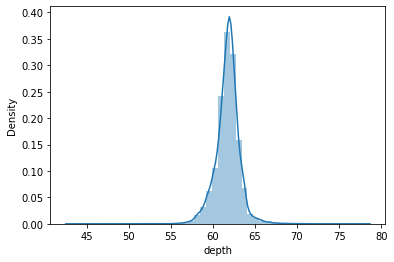

C:\Users\Alex\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


710


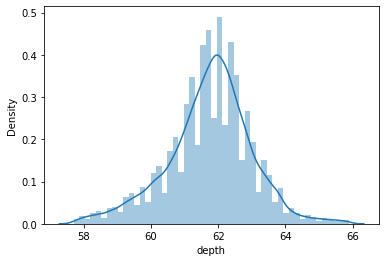

In [107]:
o_size = data.shape[0]
sns.distplot(data['depth'])
plt.show()
iqr = np.percentile(data['depth'],75) - np.percentile(data['depth'],25)
upper_limit = np.percentile(data['depth'],75) + 2.5*iqr
lower_limit = np.percentile(data['depth'],25) - 2.5*iqr
data = data[(data['depth']>lower_limit) & (data['depth']<upper_limit)]
lost_data += o_size - data.shape[0]
sns.distplot(data['depth'])
print(o_size - data.shape[0])

C:\Users\Alex\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


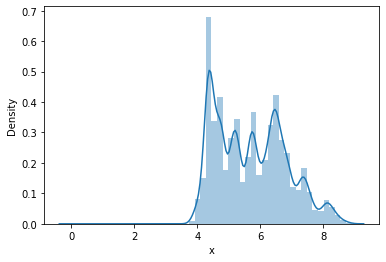

C:\Users\Alex\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


158


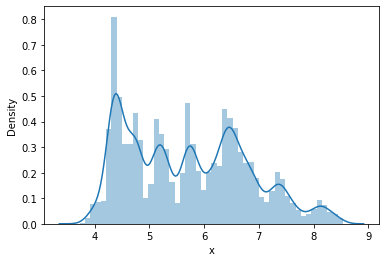

In [108]:
o_size = data.shape[0]
sns.distplot(data['x'])
plt.show()
iqr = np.percentile(data['x'],75) - np.percentile(data['x'],25)
upper_limit = np.percentile(data['x'],75) + 1.1*iqr
lower_limit = np.percentile(data['x'],25) - 1.5*iqr
data = data[(data['x']>lower_limit) & (data['x']<upper_limit)]
lost_data += o_size - data.shape[0]
sns.distplot(data['x'])
print(o_size - data.shape[0])

C:\Users\Alex\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


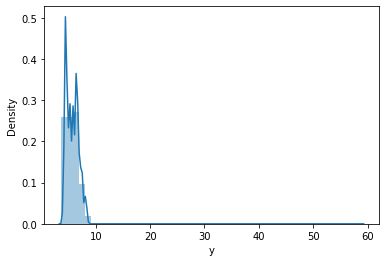

C:\Users\Alex\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


3


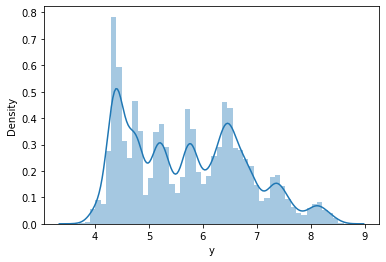

In [109]:
o_size = data.shape[0]
sns.distplot(data['y'])
plt.show()
iqr = np.percentile(data['y'],75) - np.percentile(data['y'],25)
upper_limit = np.percentile(data['y'],75) + 1.5*iqr
lower_limit = np.percentile(data['y'],0) - 0*iqr
data = data[(data['y']>lower_limit) & (data['y']<upper_limit)]
lost_data += o_size - data.shape[0]
sns.distplot(data['y'])
print(o_size - data.shape[0])

C:\Users\Alex\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


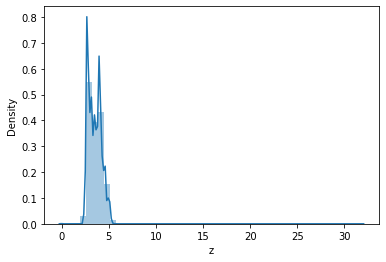

C:\Users\Alex\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


13


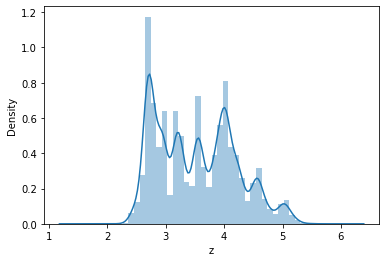

In [110]:
o_size = data.shape[0]
sns.distplot(data['z'])
plt.show()
iqr = np.percentile(data['z'],75) - np.percentile(data['z'],25)
upper_limit = np.percentile(data['z'],75) + 2.0*iqr
lower_limit = np.percentile(data['z'],25) - 1.5*iqr
data = data[(data['z']>lower_limit) & (data['z']<upper_limit)]
lost_data += o_size - data.shape[0]
sns.distplot(data['z'])
print(o_size - data.shape[0])

In [111]:
lost_data

1361

In [29]:
data.shape

(26921, 11)